# I. Algorithm

Once again, we will use sckitlearn's built in Random Forest classifier.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# II. Application to Data Set

In [20]:
game_data = pd.read_csv("../bgg_dataset.csv",delimiter=";")

# Cleaning Complexity Average and Rating Average Columns

game_data['Complexity Average'] = game_data['Complexity Average'].str.replace(',', '.').astype(float)
game_data['Rating Average'] = game_data['Rating Average'].str.replace(',', '.').astype(float)

# Selecting Columns of Top 100 Games

game_cleaned = game_data[game_data['BGG Rank'] <= 100]

game_cleaned = game_cleaned[['Rating Average','Complexity Average','Min Age']]

game_cleaned.dropna(inplace = True)


In [21]:

# Labelling teen games as those with minimum age 13 or above
game_cleaned['age_category'] = np.where(game_cleaned['Min Age'] >= 13, 1, 0)

kids = game_cleaned[game_cleaned['age_category'] == 1]
teen = game_cleaned[game_cleaned['age_category'] == 0]

Next, we'll create a plot of Rating Average vs. Complexity Average for kid games and teen games.

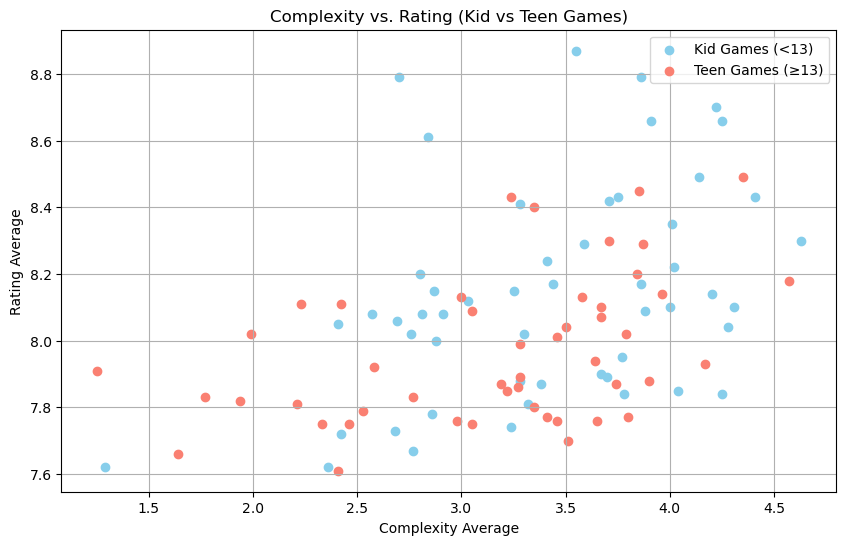

In [22]:
# Plot
plt.figure(figsize=(10, 6))
plt.scatter(kids['Complexity Average'], kids['Rating Average'], color='skyblue', label='Kid Games (<13)')
plt.scatter(teen['Complexity Average'], teen['Rating Average'], color='salmon', label='Teen Games (≥13)')

# Add labels and legend
plt.xlabel('Complexity Average')
plt.ylabel('Rating Average')
plt.title('Complexity vs. Rating (Kid vs Teen Games)')
plt.legend()
plt.grid(True)
plt.show()

Now, I'll apply a Random Forest classifier to this data.

In [27]:
X = game_cleaned[['Rating Average','Complexity Average']].to_numpy()    # Features
y = game_cleaned['age_category'].to_numpy()  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Create Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# 5. Train the Model
rf_model.fit(X_train, y_train)

# 6. Make Predictions
y_pred = rf_model.predict(X_test)

In [29]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.5

Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38         8
           1       0.58      0.58      0.58        12

    accuracy                           0.50        20
   macro avg       0.48      0.48      0.48        20
weighted avg       0.50      0.50      0.50        20

